In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import seaborn as sns
import re
import os
import time
import plotly.express as px

In [2]:
df=pd.read_csv('heart.csv')
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [3]:
df.describe()

age         sex          cp      trtbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg    thalachh        exng     oldpeak         slp         caa  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

            thall      output  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [4]:
df.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [6]:
df.output.value_counts()

1    165
0    138
Name: output, dtype: int64

In [7]:
df.shape

(303, 14)

In [8]:
df.loc[df.duplicated()]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
164   38    1   2     138   175    0        1       173     0      0.0    2   

     caa  thall  output  
164    4      2       1

In [9]:
df.isnull().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [10]:
df.corr()

age       sex        cp    trtbps      chol       fbs  \
age       1.000000 -0.098447 -0.068653  0.279351  0.213678  0.121308   
sex      -0.098447  1.000000 -0.049353 -0.056769 -0.197912  0.045032   
cp       -0.068653 -0.049353  1.000000  0.047608 -0.076904  0.094444   
trtbps    0.279351 -0.056769  0.047608  1.000000  0.123174  0.177531   
chol      0.213678 -0.197912 -0.076904  0.123174  1.000000  0.013294   
fbs       0.121308  0.045032  0.094444  0.177531  0.013294  1.000000   
restecg  -0.116211 -0.058196  0.044421 -0.114103 -0.151040 -0.084189   
thalachh -0.398522 -0.044020  0.295762 -0.046698 -0.009940 -0.008567   
exng      0.096801  0.141664 -0.394280  0.067616  0.067023  0.025665   
oldpeak   0.210013  0.096093 -0.149230  0.193216  0.053952  0.005747   
slp      -0.168814 -0.030711  0.119717 -0.121475 -0.004038 -0.059894   
caa       0.276326  0.118261 -0.181053  0.101389  0.070511  0.137979   
thall     0.068001  0.210041 -0.161736  0.062210  0.098803 -0.032019   
output   -0.225439 -0.280937  0.433798 -0.144931 -0.085239 -0.028046   

           restecg  thalachh      exng   oldpeak       slp       caa  \
age      -0.116211 -0.398522  0.096801  0.210013 -0.168814  0.276326   
sex      -0.058196 -0.044020  0.141664  0.096093 -0.030711  0.118261   
cp        0.044421  0.295762 -0.394280 -0.149230  0.119717 -0.181053   
trtbps   -0.114103 -0.046698  0.067616  0.193216 -0.121475  0.101389   
chol     -0.151040 -0.009940  0.067023  0.053952 -0.004038  0.070511   
fbs      -0.084189 -0.008567  0.025665  0.005747 -0.059894  0.137979   
restecg   1.000000  0.044123 -0.070733 -0.058770  0.093045 -0.072042   
thalachh  0.044123  1.000000 -0.378812 -0.344187  0.386784 -0.213177   
exng     -0.070733 -0.378812  1.000000  0.288223 -0.257748  0.115739   
oldpeak  -0.058770 -0.344187  0.288223  1.000000 -0.577537  0.222682   
slp       0.093045  0.386784 -0.257748 -0.577537  1.000000 -0.080155   
caa      -0.072042 -0.213177  0.115739  0.222682 -0.080155  1.000000   
thall    -0.011981 -0.096439  0.206754  0.210244 -0.104764  0.151832   
output    0.137230  0.421741 -0.436757 -0.430696  0.345877 -0.391724   

             thall    output  
age       0.068001 -0.225439  
sex       0.210041 -0.280937  
cp       -0.161736  0.433798  
trtbps    0.062210 -0.144931  
chol      0.098803 -0.085239  
fbs      -0.032019 -0.028046  
restecg  -0.011981  0.137230  
thalachh -0.096439  0.421741  
exng      0.206754 -0.436757  
oldpeak   0.210244 -0.430696  
slp      -0.104764  0.345877  
caa       0.151832 -0.391724  
thall     1.000000 -0.344029  
output   -0.344029  1.000000

### Analysis

#### Univariate Analysis

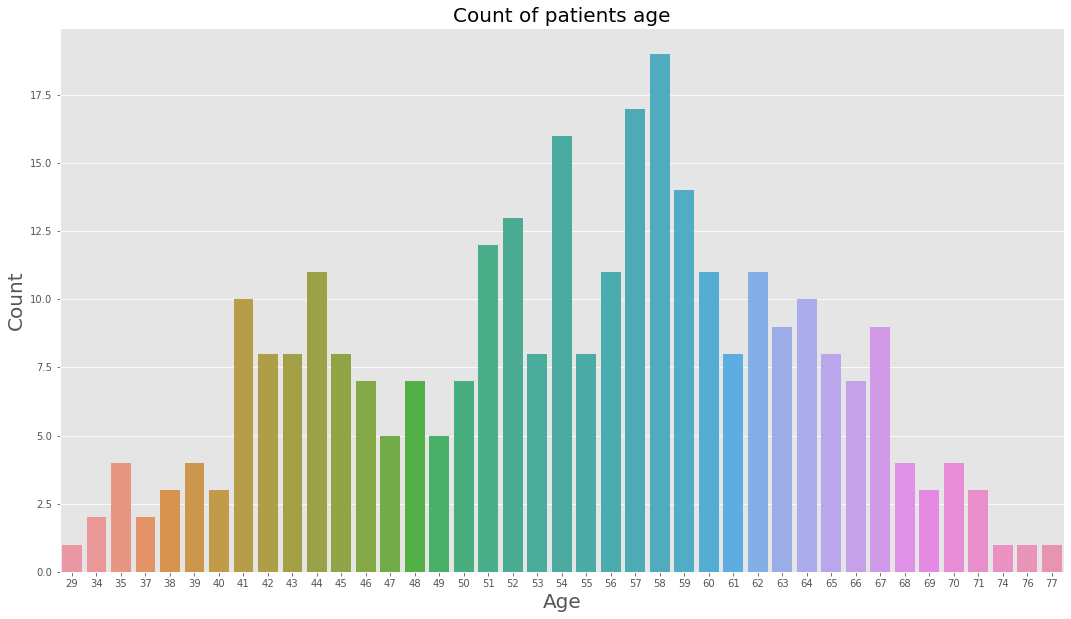

In [11]:
plt.figure(figsize=(18,10))
plt.style.use('ggplot')
sns.countplot(x=df['age'])
plt.title("Count of patients age",fontsize=20)
plt.xlabel('Age',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.show()

### - So Majority of the patients in our dataset is in late 50's or early 60's

In [54]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

In [103]:
f=df['fbs'].value_counts().reset_index()
f['labels']=['normal','pre-diabetes(fbs>120mg/dl)']
f

index  fbs                      labels
0      0  258                      normal
1      1   45  pre-diabetes(fbs>120mg/dl)

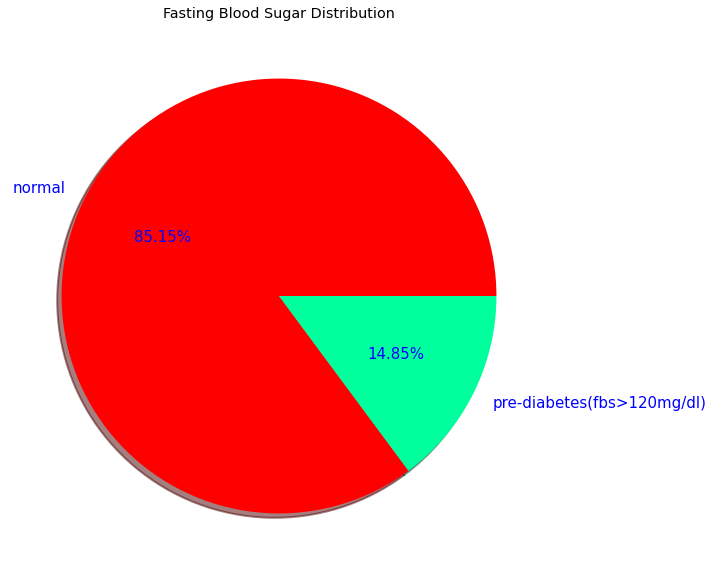

In [237]:
cmap = plt.get_cmap('hsv')
colors = [cmap(i) for i in np.linspace(0, 4, 10)]
plt.figure(figsize=(20,10))
plt.title('Fasting Blood Sugar Distribution')
plt.pie(f['fbs'],labels=f['labels'],textprops={'fontsize':15,'color':'Blue'},
        wedgeprops = {'linewidth': 2},shadow=True,autopct='%.2f%%',colors=colors)
plt.show()

In [238]:
c=df['cp'].value_counts().reset_index()
c

index   cp
0      0  143
1      2   87
2      1   50
3      3   23

In [239]:
def vals(row):
    if row['index']==0:
        return 'typical angina'
    if row['index']==1:
        return 'atypical angina'
    if row['index']==2:
        return'non-anginal pain'
    if row['index']==3:
        return 'asymptomatic'

In [240]:
c['labels']=c.apply(lambda row:vals(row),axis=1)
c

index   cp            labels
0      0  143    typical angina
1      2   87  non-anginal pain
2      1   50   atypical angina
3      3   23      asymptomatic

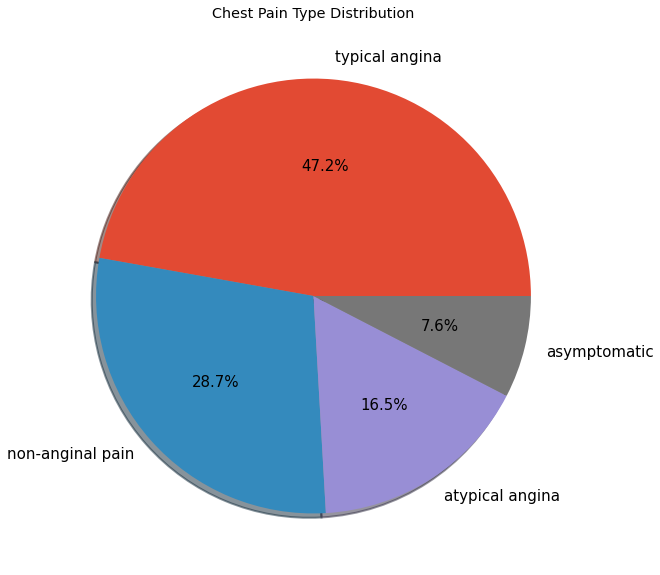

In [245]:
import matplotlib.cm as cm
plt.figure(figsize=(20,10))
plt.title('Chest Pain Type Distribution')
plt.pie(c['cp'],labels=c['labels'],textprops={'fontsize':15,'color':'Black'},
        wedgeprops = {'linewidth': 2},shadow=True,autopct='%.1f%%')
plt.show()

In [153]:
df['fbs']

0      1
1      0
2      0
3      0
4      0
      ..
298    0
299    0
300    1
301    0
302    0
Name: fbs, Length: 303, dtype: int64

In [154]:
s=df['sex'].value_counts().reset_index()
s

index  sex
0      1  207
1      0   96

In [13]:
px.pie(s,names="index",values="sex")

### Hence, Majority of the patients are Male.

In [14]:
c=df['cp'].value_counts().reset_index()
c

index   cp
0      0  143
1      2   87
2      1   50
3      3   23

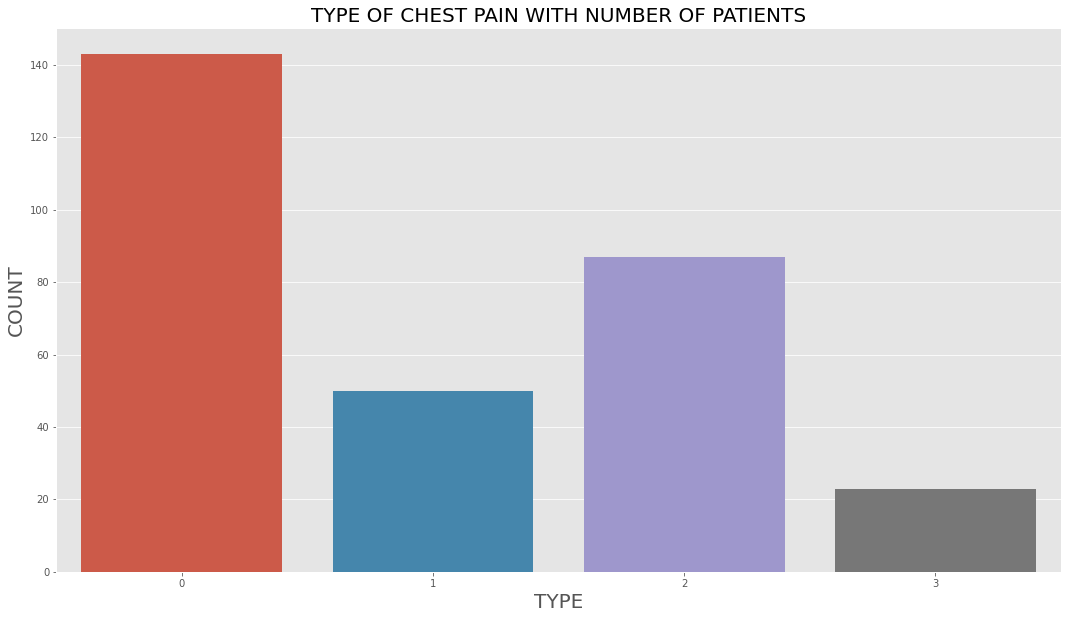

In [15]:
plt.figure(figsize=(18,10))
plt.style.use('ggplot')
sns.barplot(x=c['index'],y=c["cp"])
plt.title("TYPE OF CHEST PAIN WITH NUMBER OF PATIENTS",fontsize=20)
plt.xlabel("TYPE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()


###  Majority of the patient's chest pain is of type 0

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



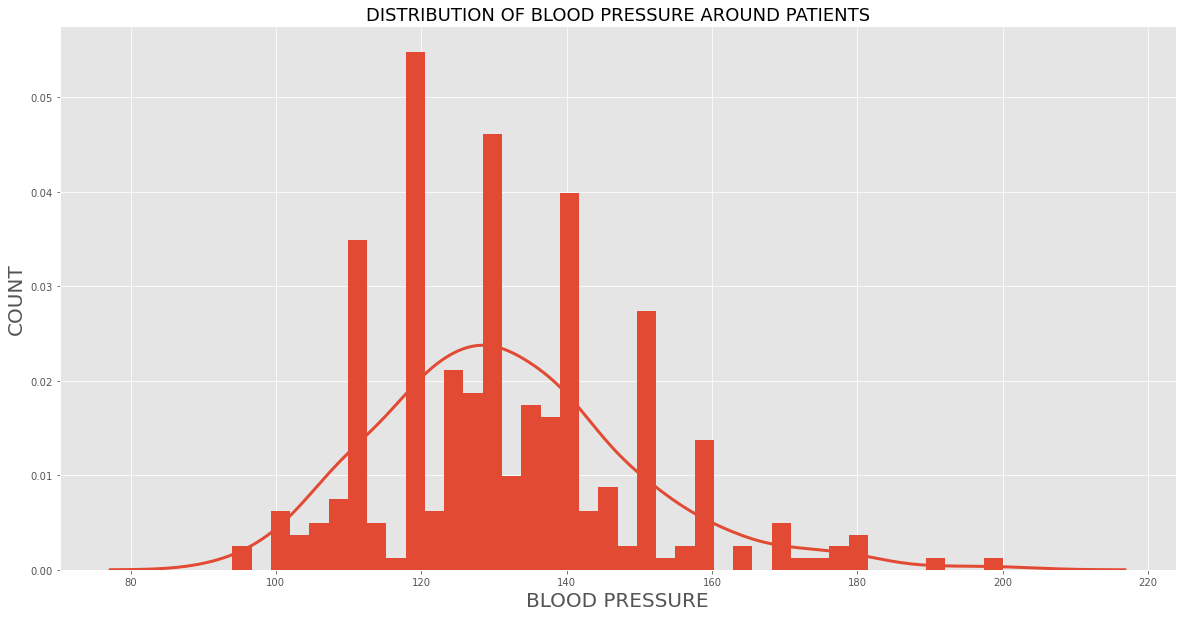

In [16]:
from scipy.stats import norm
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.distplot(df["trtbps"],bins=40,kde=True,hist_kws={'alpha':1,'histtype':'stepfilled'},kde_kws={'lw':3})   #using distplot here
plt.title("DISTRIBUTION OF BLOOD PRESSURE AROUND PATIENTS",fontsize=18)
plt.xlabel("BLOOD PRESSURE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

In [17]:
df.head()

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0   63    1   3     145   233    1        0       150     0      2.3    0   
1   37    1   2     130   250    0        1       187     0      3.5    0   
2   41    0   1     130   204    0        0       172     0      1.4    2   
3   56    1   1     120   236    0        1       178     0      0.8    2   
4   57    0   0     120   354    0        1       163     1      0.6    2   

   caa  thall  output  
0    0      1       1  
1    0      2       1  
2    0      2       1  
3    0      2       1  
4    0      2       1

<Figure size 1440x720 with 0 Axes>

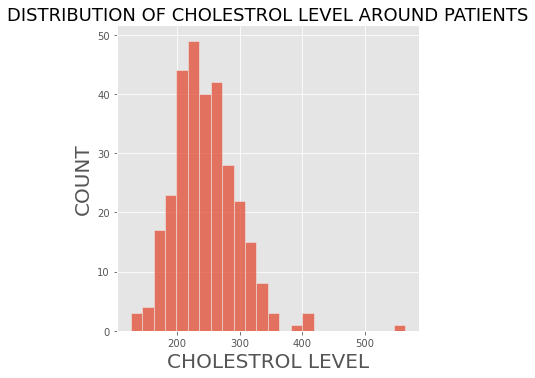

In [18]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.displot(df["chol"])
plt.title("DISTRIBUTION OF CHOLESTROL LEVEL AROUND PATIENTS",fontsize=18)
plt.xlabel("CHOLESTROL LEVEL",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

<Figure size 1440x720 with 0 Axes>

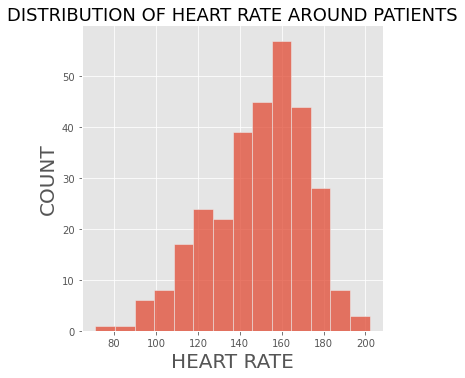

In [19]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.displot(df["thalachh"])
plt.title("DISTRIBUTION OF HEART RATE AROUND PATIENTS",fontsize=18)
plt.xlabel("HEART RATE",fontsize=20)
plt.ylabel("COUNT",fontsize=20)
plt.show()

<div class="alert alert-block alert-info">
    
#### INSIGHT : Uni-Variate Analysis Of The Data:

- Most of the patients have age (50-60).In which maximum number of Patients have age 56.
- Around 68.2% (207) are Male patients and 31.8% (96) are Female patients .
- Most of the patients have type Value 1 Chest Pain that is typical angina Value.
- Most of the patients Blood Pressure lies between (130-140).
- Most of the patients Chlostrol level lies between (200-250).
- Most of the patients Heart Rate lies between (155-165).

### BI-VARIATE ANALYSYS

## 1. AGE

In [20]:
df[['age','output']].value_counts().sort_values()

age  output
29   1          1
38   0          1
39   0          1
77   0          1
40   1          1
               ..
59   0          9
41   1          9
57   0         10
54   1         10
58   0         12
Length: 75, dtype: int64

In [21]:
df.output.unique()

array([1, 0], dtype=int64)

In [22]:
df[df['age']==35]

age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
65    35    0   0     138   183    0        1       182     0      1.4    2   
157   35    1   1     122   192    0        1       174     0      0.0    2   
227   35    1   0     120   198    0        1       130     1      1.6    1   
239   35    1   0     126   282    0        0       156     1      0.0    2   

     caa  thall  output  
65     0      2       1  
157    0      2       1  
227    0      3       0  
239    0      3       0

In [26]:
v=pd.crosstab(df["age"],df['output']).reset_index()
v.head()

output  age  0  1
0        29  0  1
1        34  0  2
2        35  2  2
3        37  0  2
4        38  1  2

In [34]:
v.columns=['age','low_risk','high_risk']

In [35]:
v.head()

age  low_risk  high_risk
0   29         0          1
1   34         0          2
2   35         2          2
3   37         0          2
4   38         1          2

In [36]:
px.line(v,v['age'],v['high_risk'],title='RISK OF HIGH HEART-ATTACK WITH AGE')

In [37]:
px.line(v,v['age'],v['low_risk'],title='RISK OF LOW HEART-ATTACK WITH AGE')

Text(0, 0.5, 'Blood Pressure')

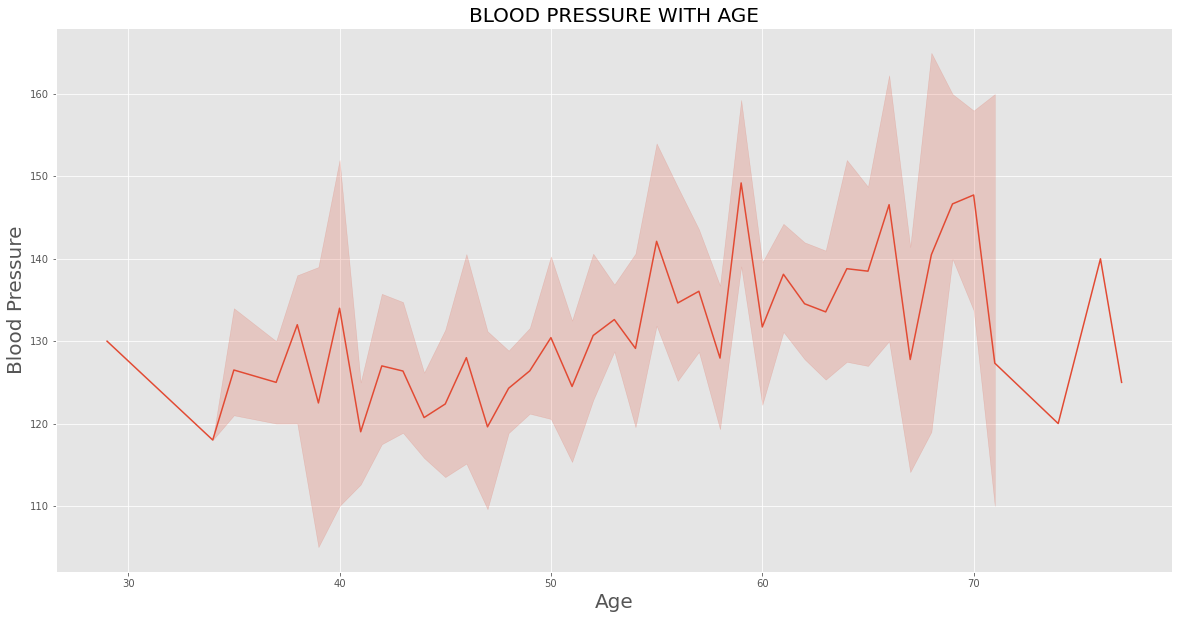

In [38]:
# Blood pressure with Age
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
sns.lineplot(y='trtbps',x='age',data=df)
plt.title('BLOOD PRESSURE WITH AGE',fontsize=20)
plt.xlabel('Age', fontsize=20)
plt.ylabel('Blood Pressure',fontsize=20)

### So, from the line chart above we can say that Blood pressure increases with age

In [39]:
df_high=df[df.output==1]
df_low=df[df.output==0]

Text(0, 0.5, 'Cholesterol')

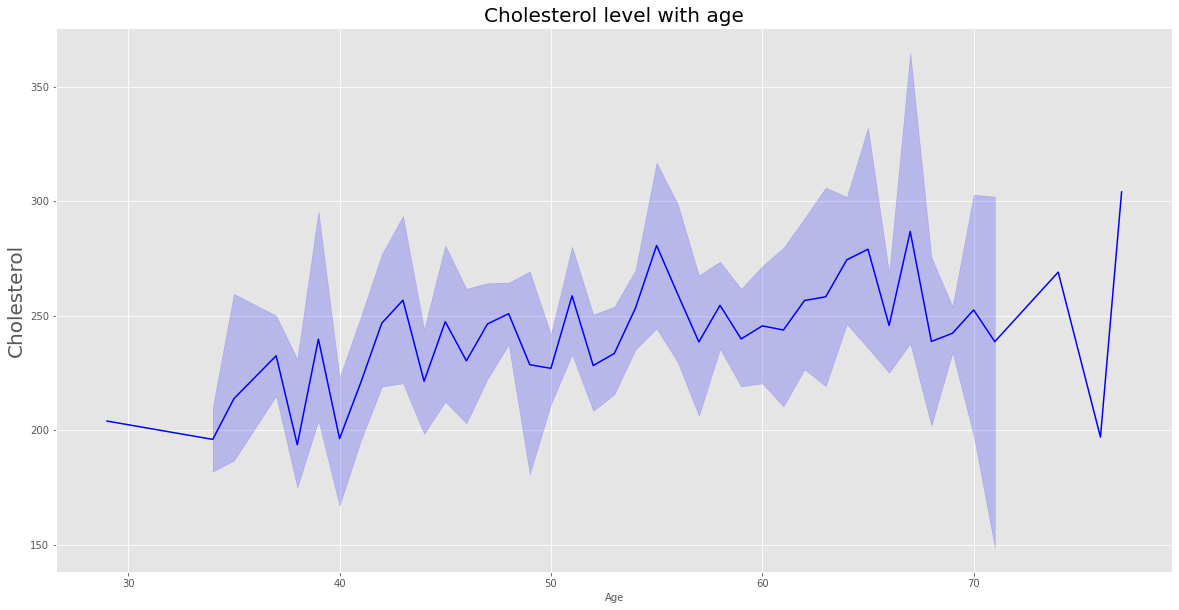

In [40]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
sns.lineplot(y='chol',x='age',data=df,color='blue')
plt.xlabel('Age',fontsize=10)
plt.title('Cholesterol level with age',fontsize=20)
plt.ylabel('Cholesterol',fontsize=20)

### The lineplot indicates that cholesterol level increases with age.

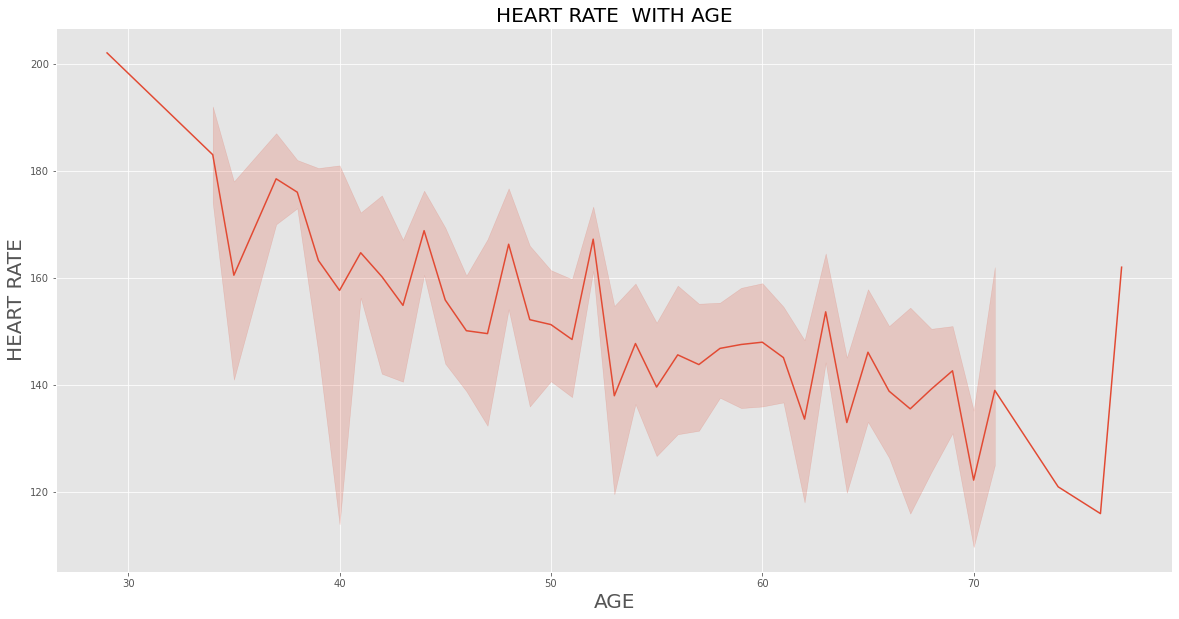

In [41]:
plt.figure(figsize=(20,10))
plt.style.use("ggplot")
sns.lineplot(y="thalachh",x="age",data=df)
plt.title("HEART RATE  WITH AGE",fontsize=20)
plt.xlabel("AGE",fontsize=20)
plt.ylabel("HEART RATE",fontsize=20)
plt.show()

### Heart rate goes down with age

<div class="alert alert-block alert-warning">


#### INSIGHT : Bi-Variate Analysis Of The Data:

- There is no strong Relationship with age and heart attack.So we can't say with Increasing the Age There is high Chance of Heart attack or Low Chance of Heart Attack.
- There is high chance of Increase in Blood Pressure in the body With Increase in Age .
- There is high chance of Increase in Cholestrol Level in the body with increase in Age.
- There is high chance of Increase in Heart Rate in the body with increase in Age

### Multivariate Analysis

#### Question 1 : What is the effect of Age and cholesterol on heart attack 

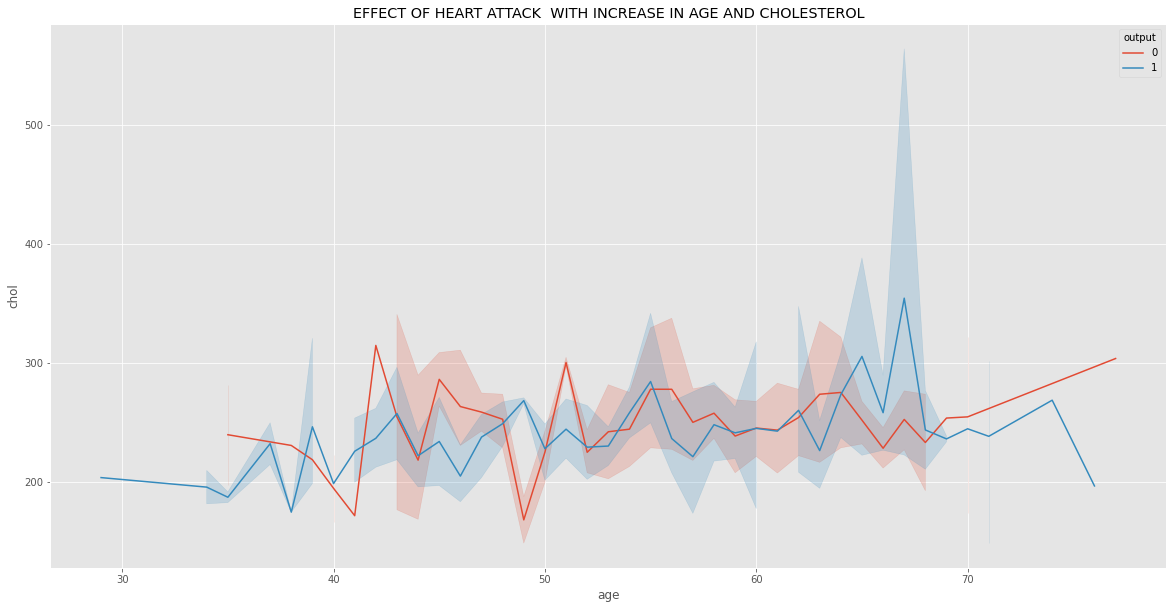

In [42]:
plt.figure(figsize=(20,10))
plt.style.use('ggplot')
sns.lineplot(x='age',y='chol',hue='output',data=df)
plt.title('EFFECT OF HEART ATTACK  WITH INCREASE IN AGE AND CHOLESTEROL')
plt.show()

### Increase in Age and Resting Blood Pressure increases the risk of heart attack

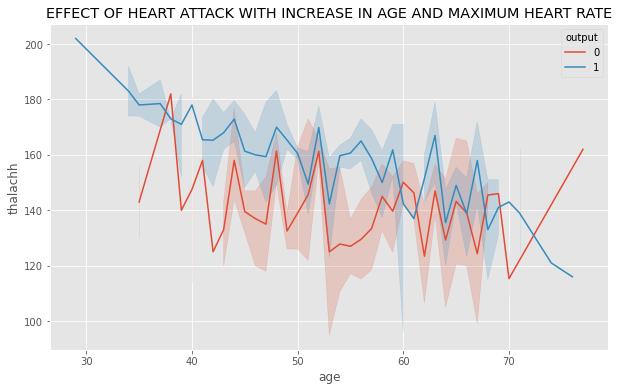

In [43]:
plt.figure(figsize=(10,6))
plt.style.use("ggplot")
sns.lineplot(x="age",y="thalachh",hue='output',data=df)
plt.title("EFFECT OF HEART ATTACK WITH INCREASE IN AGE AND MAXIMUM HEART RATE")
plt.show()

### Heart rate decreases with increased age.

<AxesSubplot:>

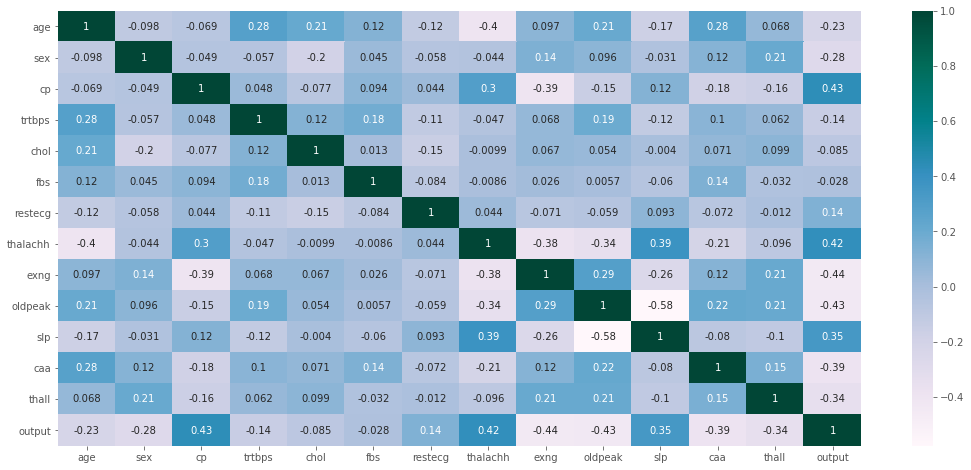

In [44]:
plt.figure(figsize=(18,8))
sns.heatmap(df.corr(),annot=True,cmap='PuBuGn')

In [51]:
sns.scatterplot(y='output',x='slp',data=df)

<AxesSubplot:xlabel='slp', ylabel='output'>

In [47]:
sns.regplot(y='chol',x='output',data=df)

<AxesSubplot:xlabel='output', ylabel='chol'>

<AxesSubplot:xlabel='output', ylabel='chol'>

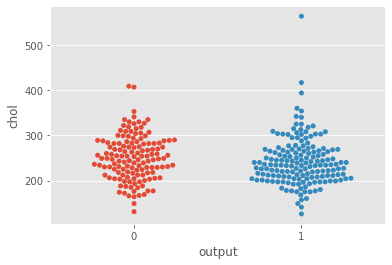

In [48]:
sns.swarmplot(y='chol',x='output',data=df)

In [49]:
plt.figure(figsize=(12,8))
plt.style.use('ggplot')
sns.histplot(data=df,x='age',hue='output')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Does Age Effect Heart Attack')
plt.show()